In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [61]:
df = pd.read_csv("IMDB-Movie-Data.csv")
print(df["Genre"].head(3))

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: object


In [44]:
# print(df.head(1))

In [45]:
# 获取电影的平均评分
print(df["Rating"].mean())
# 获取导演人数
print(len(df["Director"].tolist()))
# set 是生成集合(集合的无重复元素)
print(len(set(df["Director"])))
# unq函数效果一样
print(len(df["Director"].unique()))


6.723200000000003
1000
644
644


In [46]:
# 获取演员的人数
temp_actor_list = df["Actors"].str.split(",").tolist()
actors_list = [i for j in temp_actor_list for i in j]
num = len(set(actors_list))
print(num)



2394


In [47]:
# 对rating, runtime的分布情况
# 选择图形 : 直方图
runtime_data = df["Runtime (Minutes)"].values
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

In [48]:
# 计算组数
num_bin = (max_runtime - min_runtime) // 5
print(max_runtime- min_runtime)

125


([<matplotlib.axis.XTick at 0x2dbd12c9688>,
 <a list of 26 Text xticklabel objects>)

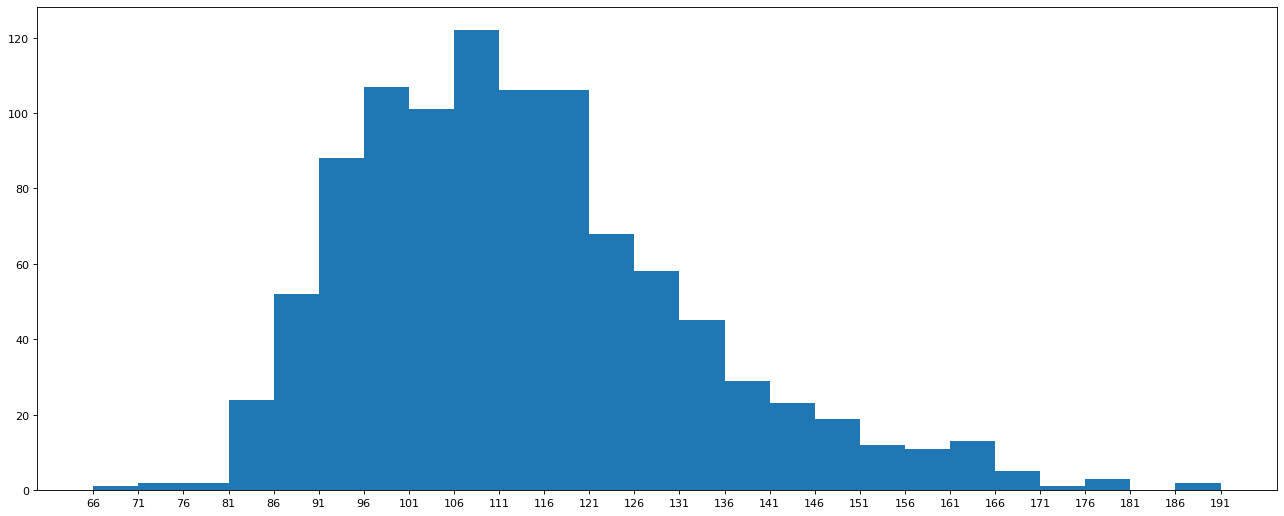

In [74]:
# 设置图像大小
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(runtime_data, num_bin)
plt.xticks(range(min_runtime, max_runtime+5, 5))

# plt.show()

In [73]:
# ========================================================
# ========================================================

In [65]:
temp_list = df["Genre"].str.split(",").tolist()
genre_list = list(set([i for j in temp_list for i in j]))
 # 构造全为0的数组, 行为电影数目, 列为种类
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))),
             columns = genre_list) # 列索引为genre_list

In [66]:
# 对行数遍历, 要是有 
for i in range(df.shape[0]):
    zeros_df.loc[i, temp_list[i]] = 1
# print(zeros_df.head(3))

In [67]:
# 统计每个分类的电影的数量和
genre_count = zeros_df.sum(axis=0)
# print(genre_count)

Western        7.0
Family        51.0
Animation     49.0
Romance      141.0
Fantasy      101.0
Horror       119.0
Drama        513.0
Comedy       279.0
Mystery      106.0
Musical        5.0
Adventure    259.0
Biography     81.0
Sci-Fi       120.0
History       29.0
War           13.0
Thriller     195.0
Music         16.0
Crime        150.0
Sport         18.0
Action       303.0
dtype: float64


([<matplotlib.axis.XTick at 0x2dbce44b1c8>,
 <a list of 20 Text xticklabel objects>)

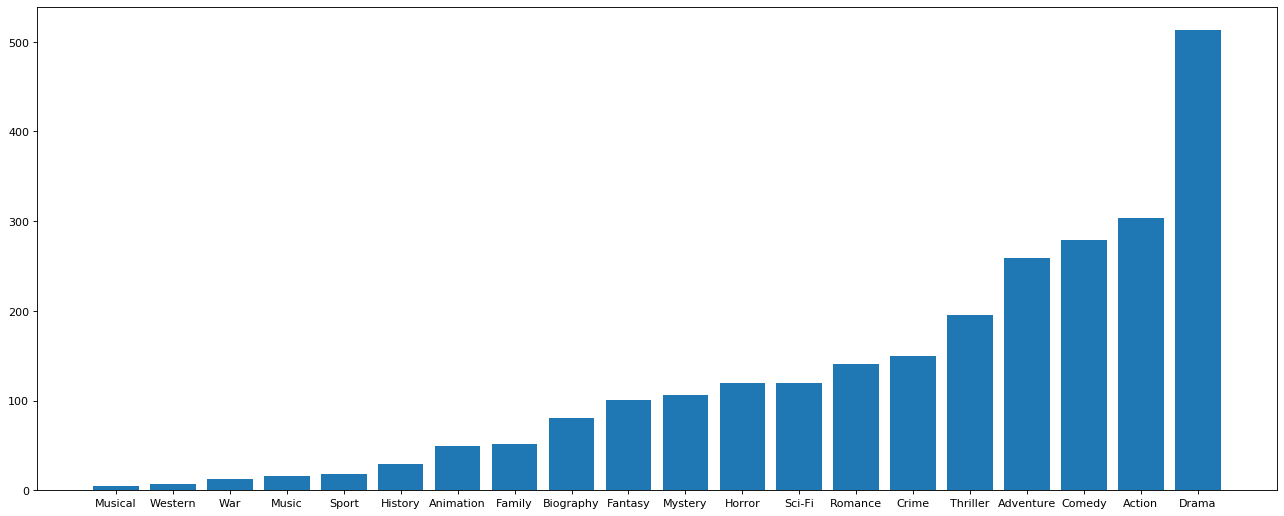

In [71]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# make pic
plt.figure(figsize=(20, 8), dpi = 80)
plt.bar(range(len(_x)), _y)
plt.xticks(range(len(_x)), _x)